In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Online Retail.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df =  df.drop(columns=['Description'])
df.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [7]:
df_cleaned = df.dropna(subset=['CustomerID'])

In [8]:
df_cleaned= df_cleaned.drop_duplicates()
df_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Sales          0
dtype: int64

In [9]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [10]:
quantity_mean = df_cleaned['Quantity'].mean()
quantity_std = df_cleaned['Quantity'].std()
unitprice_mean = df_cleaned['UnitPrice'].mean()
unitprice_std = df_cleaned['UnitPrice'].std()
df_cleaned.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
quantity_mean, quantity_std, unitprice_mean, unitprice_std

(12.182578772018068, 250.28324786246193, 3.4740641580470224, 69.76420868919945)

In [12]:
df['Sales'] = df['UnitPrice'] * df['Quantity']

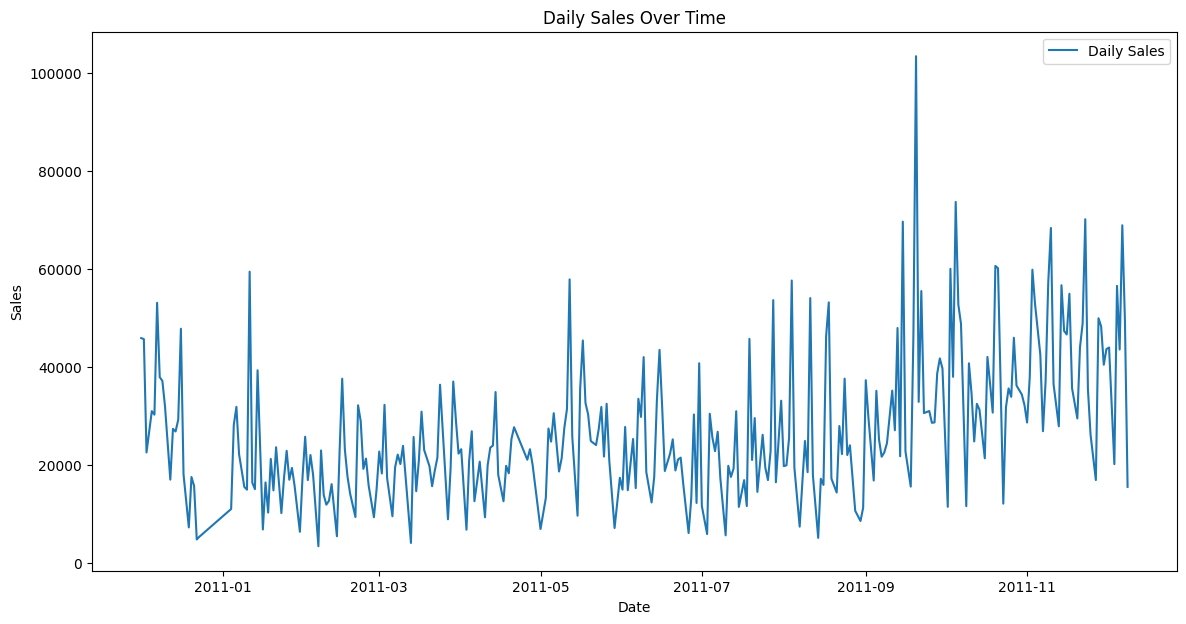

In [13]:
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date)['Sales'].sum()
plt.figure(figsize=(14, 7))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

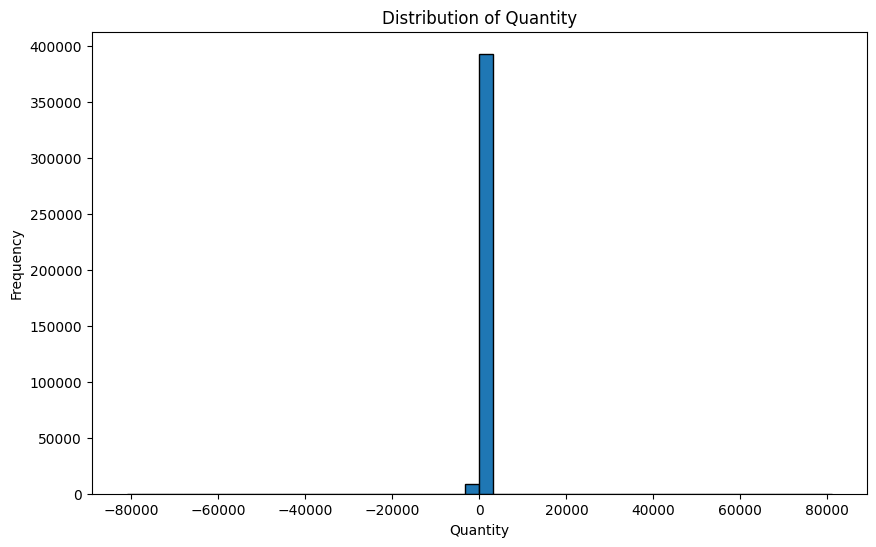

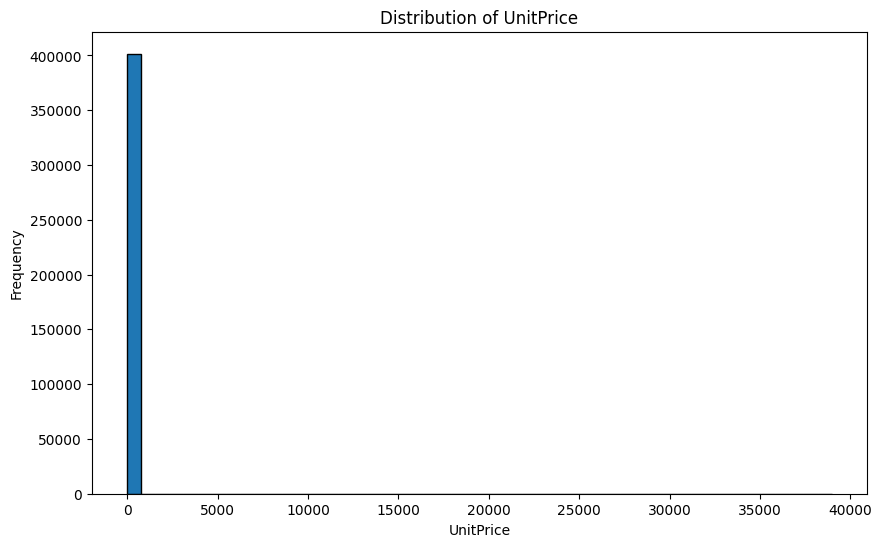

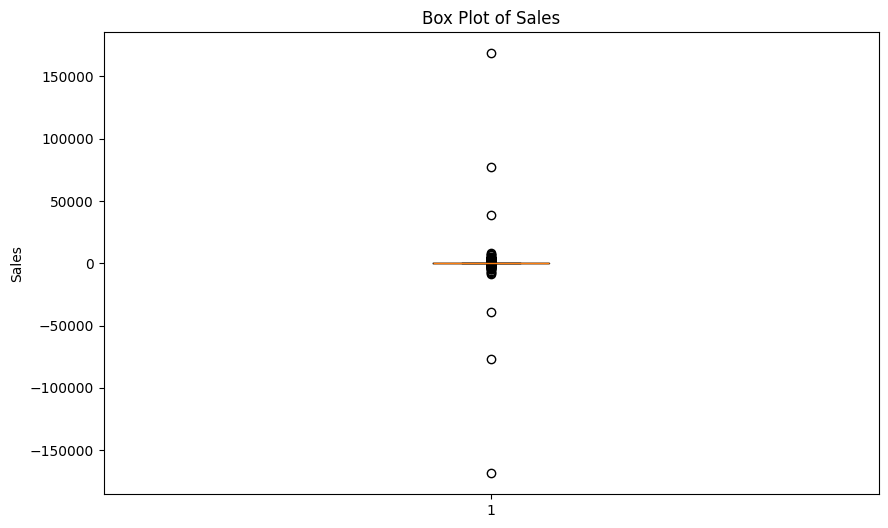

In [14]:
# Histogram of Quantity
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['Quantity'], bins=50, edgecolor='k')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

# Histogram of UnitPrice
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['UnitPrice'], bins=50, edgecolor='k')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.title('Distribution of UnitPrice')
plt.show()

# Box plot of Sales
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()


In [15]:
# Create rolling averages and other features
df_cleaned['Sales_rolling_mean'] = df_cleaned['Sales'].rolling(window=7).mean()
df_cleaned['Sales_pct_change'] = df_cleaned['Sales'].pct_change()
df_cleaned['Sales_lag'] = df_cleaned['Sales'].shift(1)
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned.fillna(method='ffill', inplace=True)
df_cleaned.fillna(method='bfill', inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_12896\3089073409.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='ffill', inplace=True)
C:\Users\harsh\AppData\Local\Temp\ipykernel_12896\3089073409.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned.fillna(method='bfill', inplace=True)


In [16]:
# Aggregate data at weekly and monthly levels
weekly_sales = df_cleaned.resample('W', on='InvoiceDate')['Sales'].sum()
monthly_sales = df_cleaned.resample('M', on='InvoiceDate')['Sales'].sum()


C:\Users\harsh\AppData\Local\Temp\ipykernel_12896\3971077974.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_cleaned.resample('M', on='InvoiceDate')['Sales'].sum()


In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_cleaned['Country_Label'] = label_encoder.fit_transform(df_cleaned['Country'])
country_counts = df_cleaned['Country'].value_counts()
country_counts

Country
United Kingdom          356726
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [18]:
top_countries = country_counts.index[:10]
df_cleaned['Country'] = df_cleaned['Country'].apply(lambda x: x if x in top_countries else 'Other')
country_freq = df_cleaned['Country'].value_counts() / len(df_cleaned)
df_cleaned['Country_Freq'] = df_cleaned['Country'].map(country_freq)
retail_data_encoded = df_cleaned.drop(columns=['Country'])
print(retail_data_encoded.head())

  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55     17850.0   
1    536365     71053         6 2010-12-01 08:26:00       3.39     17850.0   
2    536365    84406B         8 2010-12-01 08:26:00       2.75     17850.0   
3    536365    84029G         6 2010-12-01 08:26:00       3.39     17850.0   
4    536365    84029E         6 2010-12-01 08:26:00       3.39     17850.0   

   Sales  Sales_rolling_mean  Sales_pct_change  Sales_lag  Country_Label  \
0  15.30           19.874286          0.329412      15.30             35   
1  20.34           19.874286          0.329412      15.30             35   
2  22.00           19.874286          0.081613      20.34             35   
3  20.34           19.874286         -0.075455      22.00             35   
4  20.34           19.874286          0.000000      20.34             35   

   Country_Freq  
0      0.888258  
1      0.888258  
2      0.888258  
3 

In [19]:
features = ['Quantity', 'UnitPrice', 'Sales', 'Sales_rolling_mean', 'Sales_pct_change', 'Sales_lag', 'Country_Freq']
retail_data_model = retail_data_encoded.dropna(subset=features)
retail_data_encoded.info()
retail_data_encoded.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 401602 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           401602 non-null  object        
 1   StockCode           401602 non-null  object        
 2   Quantity            401602 non-null  int64         
 3   InvoiceDate         401602 non-null  datetime64[ns]
 4   UnitPrice           401602 non-null  float64       
 5   CustomerID          401602 non-null  float64       
 6   Sales               401602 non-null  float64       
 7   Sales_rolling_mean  401602 non-null  float64       
 8   Sales_pct_change    401602 non-null  float64       
 9   Sales_lag           401602 non-null  float64       
 10  Country_Label       401602 non-null  int32         
 11  Country_Freq        401602 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(1), int64(1), object(2)
memory usage: 38.3+ MB


InvoiceNo             0
StockCode             0
Quantity              0
InvoiceDate           0
UnitPrice             0
CustomerID            0
Sales                 0
Sales_rolling_mean    0
Sales_pct_change      0
Sales_lag             0
Country_Label         0
Country_Freq          0
dtype: int64

In [20]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [31]:
features = ['Quantity', 'UnitPrice', 'Sales', 'Sales_rolling_mean', 'Sales_pct_change', 'Sales_lag']
X = retail_data_model[features]
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)
anomaly_iso = iso_forest.decision_function(X)
y_pred_iso_forest = iso_forest.predict(X)

ocsvm = OneClassSVM(nu = 0.01)
ocsvm.fit(X)
anomaly_ocsvm= ocsvm.decision_function(X)
y_pred_ocsvm = ocsvm.predict(X)

In [32]:
X_new= X.copy()
X_new.loc[:,'anomalies_iso']  = y_pred_iso_forest
X_new['anomalies_iso'].value_counts()

anomalies_iso
 1    361441
-1     40161
Name: count, dtype: int64

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

input_dim = X_normalized.shape[1]
encoding_dim = 2  # Size of the encoded representation

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)

decoder = Dense(input_dim, activation="sigmoid")(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_normalized, X_normalized, 
                epochs=50, 
                batch_size=256, 
                shuffle=True, 
                validation_split=0.2)

# Display the autoencoder architecture
autoencoder.summary()



Epoch 1/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0379 - val_loss: 0.0119
Epoch 2/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0091 - val_loss: 0.0041
Epoch 3/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 4/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0014 - val_loss: 8.2433e-04
Epoch 5/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.9800e-04 - val_loss: 4.1739e-04
Epoch 6/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.5548e-04 - val_loss: 2.1954e-04
Epoch 7/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.8768e-04 - val_loss: 1.1871e-04
Epoch 8/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0013e-04 - val_loss: 6.5859e-05
Epoch 9/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5.4660e-05 - val_loss: 3.7692e-05
Epoch 10/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.0105e-05 - val_loss: 2.2494e-05
Epoch 11/50
1256/1256 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.73

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98 (396.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66 (268.00 B)

In [34]:
X_pred = autoencoder.predict(X_normalized)

12551/12551 ━━━━━━━━━━━━━━━━━━━━ 12s 983us/step


In [35]:
reconstruction_error = np.mean(np.square(X_normalized - X_pred), axis=1)

# Step 5: Determine the threshold
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)

# Step 6: Identify anomalies
anomalies = reconstruction_error > threshold

# Step 7: Convert to -1 for anomalies and 1 for normal observations
labels = np.where(anomalies, -1, 1)

# Output the results
print("Reconstruction Error:", reconstruction_error)
print("Threshold:", threshold)
print("Anomalies:", anomalies)
print("Labels:", labels)

Reconstruction Error: [9.22186467e-09 9.43591248e-09 1.02085096e-08 ... 1.25249348e-08
 1.23121706e-08 1.21458729e-08]
Threshold: 0.000701226665822553
Anomalies: [False False False ... False False False]
Labels: [1 1 1 ... 1 1 1]


In [36]:
X_new.loc[:,'anomalies_auto']  = labels

In [37]:
X_new.head()

,Quantity,UnitPrice,Sales,Sales_rolling_mean,Sales_pct_change,Sales_lag,anomalies_iso,anomalies_auto
0,6,2.55,15.30,19.874286,0.329412,15.30,1,1
1,6,3.39,20.34,19.874286,0.329412,15.30,1,1
2,8,2.75,22.00,19.874286,0.081613,20.34,1,1
3,6,3.39,20.34,19.874286,-0.075455,22.00,1,1
4,6,3.39,20.34,19.874286,0.000000,20.34,1,1


In [38]:
X_new['anomalies_auto'].value_counts()

anomalies_auto
 1    401565
-1        37
Name: count, dtype: int64

In [39]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report


# Prepare the data
features = ['Quantity', 'UnitPrice', 'Sales', 'Sales_rolling_mean', 'Sales_pct_change', 'Sales_lag']
X = retail_data_model[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Isolation Forest to identify anomalies (used to label the data)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_scaled)
y_pred_iso_forest = iso_forest.predict(X_scaled)
y = [1 if x == -1 else 0 for x in y_pred_iso_forest]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define parameter grids for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_dist_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 10, 20, 30]
}

# Hyperparameter tuning with RandomizedSearchCV
# Random Forest
rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf = random_search_rf.best_estimator_



Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [40]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
random_search_gb = RandomizedSearchCV(estimator=gb, param_distributions=param_dist_gb, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_gb.fit(X_train, y_train)
best_gb = random_search_gb.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [44]:
# XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [45]:
# LightGBM
lgb = LGBMClassifier(random_state=42)
random_search_lgb = RandomizedSearchCV(estimator=lgb, param_distributions=param_dist_lgb, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search_lgb.fit(X_train, y_train)
best_lgb = random_search_lgb.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 3249, number of negative: 318032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1484
[LightGBM] [Info] Number of data points in the train set: 321281, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010113 -> initscore=-4.583805
[LightGBM] [Info] Start training from score -4.583805
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Light

In [46]:
# Evaluate and compare models
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb,
    "LightGBM": best_lgb
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.97      0.94      0.96       768

    accuracy                           1.00     80321
   macro avg       0.99      0.97      0.98     80321
weighted avg       1.00      1.00      1.00     80321

Evaluating Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.96      0.95      0.95       768

    accuracy                           1.00     80321
   macro avg       0.98      0.97      0.98     80321
weighted avg       1.00      1.00      1.00     80321

Evaluating XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.96      0.94      0.95   

Evaluating Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.97      0.94      0.96       768

    accuracy                           1.00     80321
   macro avg       0.99      0.97      0.98     80321
weighted avg       1.00      1.00      1.00     80321



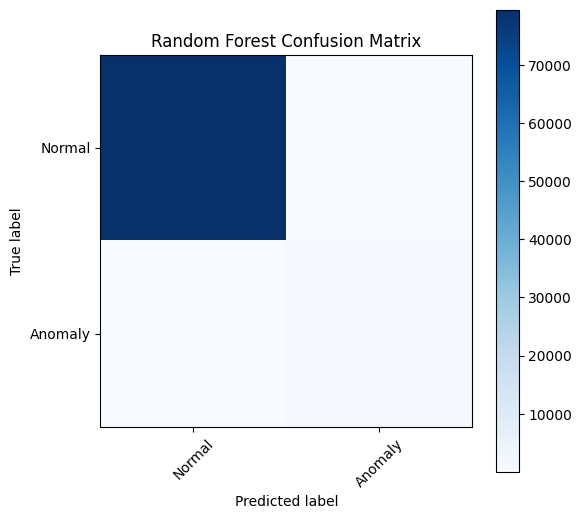

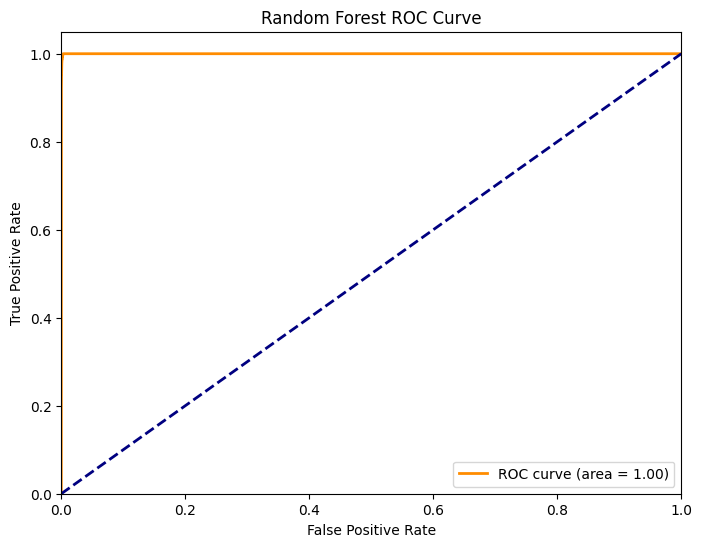

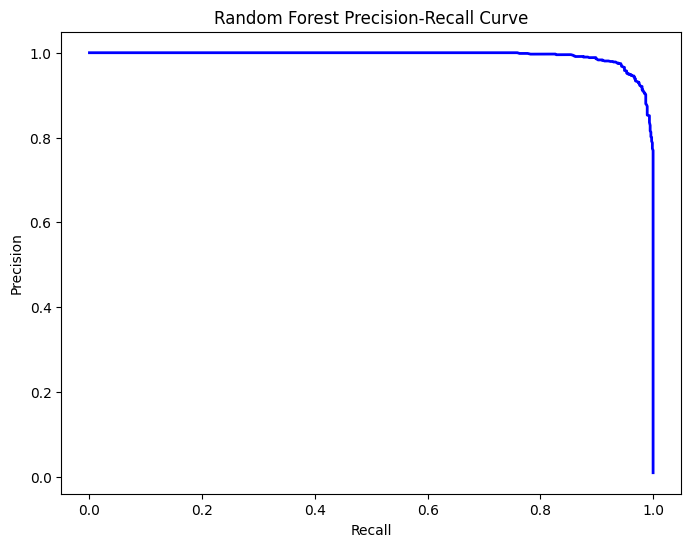

Evaluating Gradient Boosting...
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.96      0.95      0.95       768

    accuracy                           1.00     80321
   macro avg       0.98      0.97      0.98     80321
weighted avg       1.00      1.00      1.00     80321



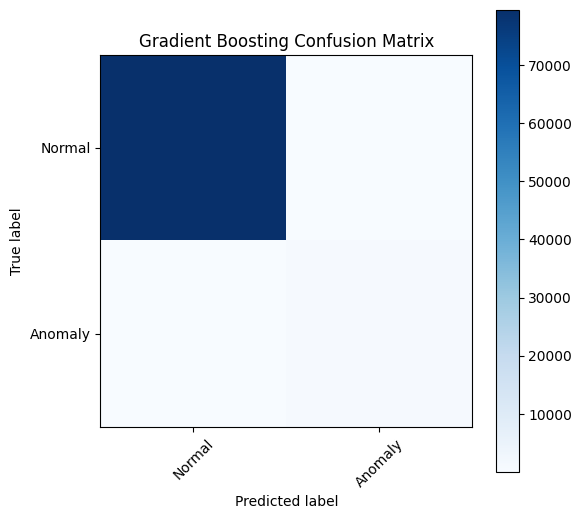

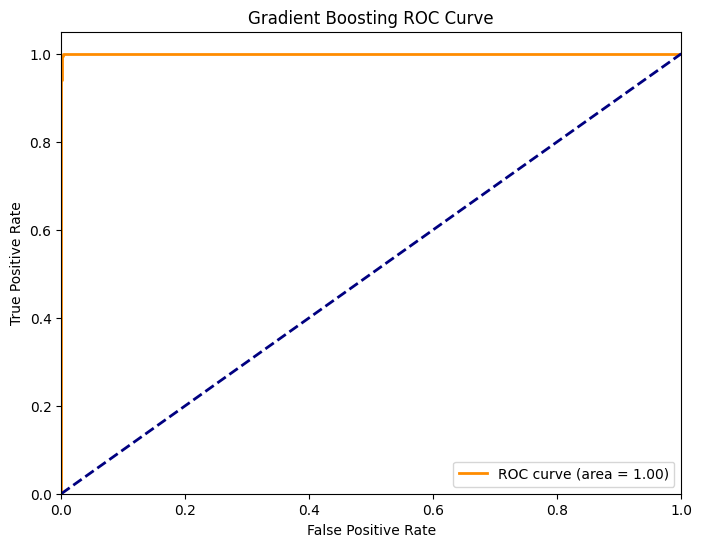

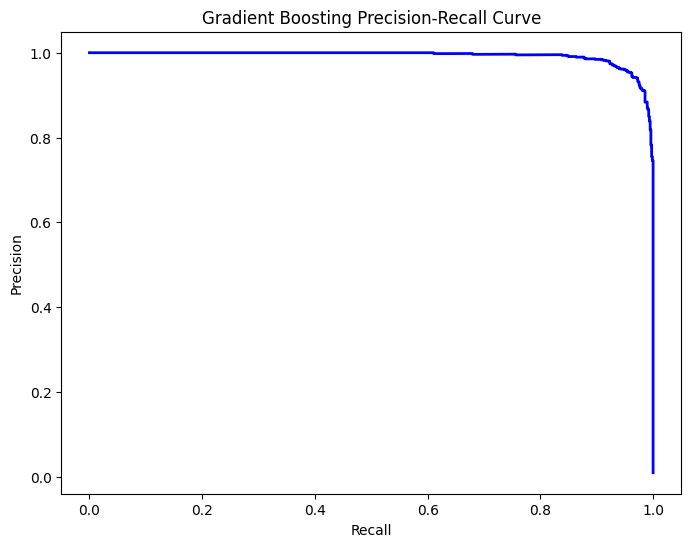

Evaluating XGBoost...
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.96      0.94      0.95       768

    accuracy                           1.00     80321
   macro avg       0.98      0.97      0.97     80321
weighted avg       1.00      1.00      1.00     80321



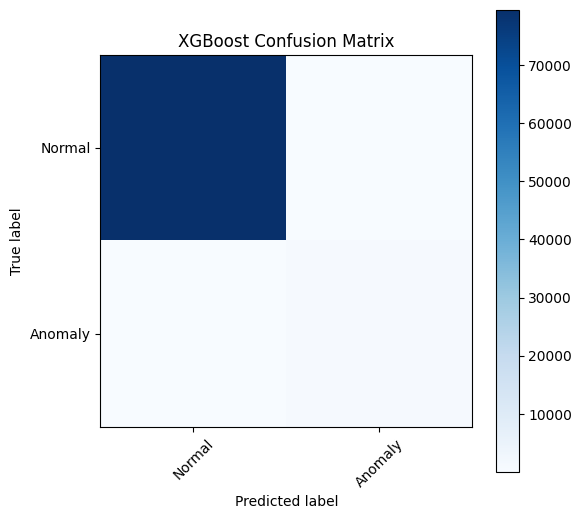

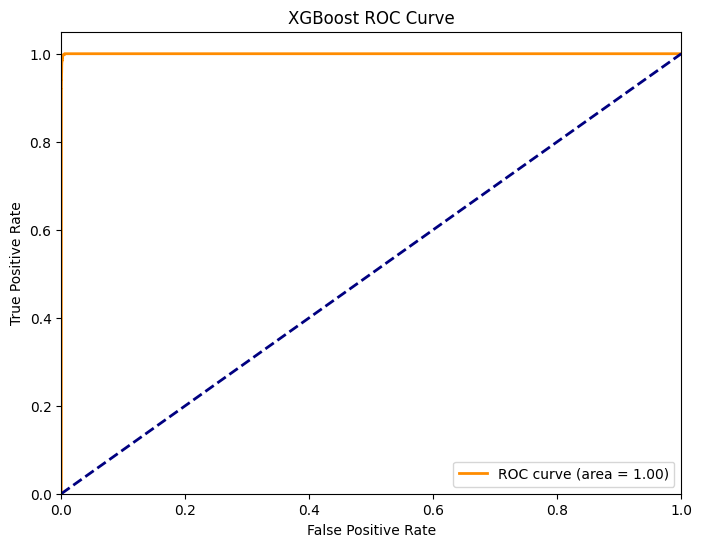

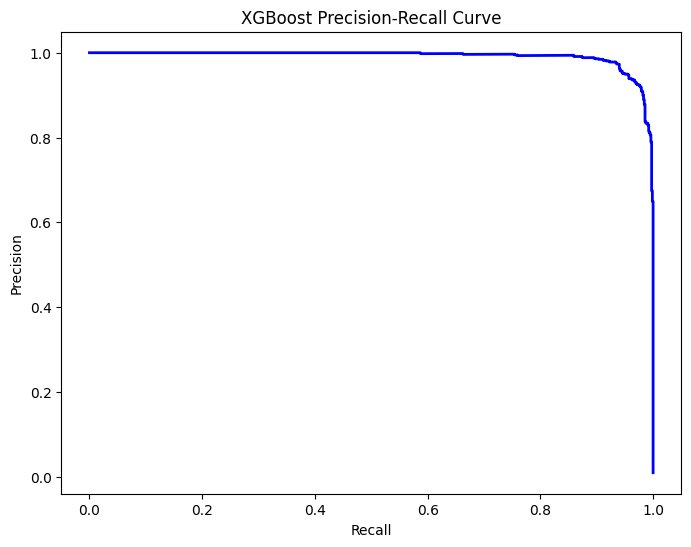

Evaluating LightGBM...
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79553
           1       0.95      0.95      0.95       768

    accuracy                           1.00     80321
   macro avg       0.97      0.98      0.98     80321
weighted avg       1.00      1.00      1.00     80321



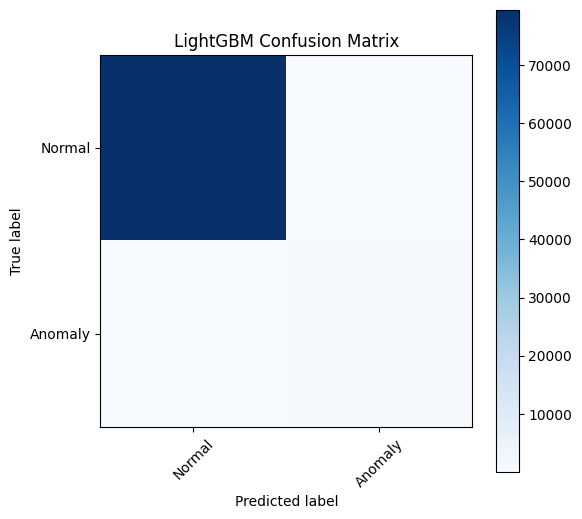

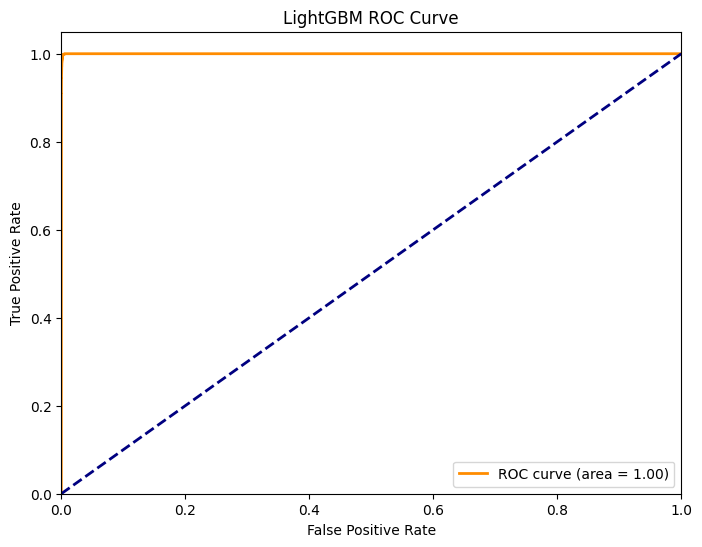

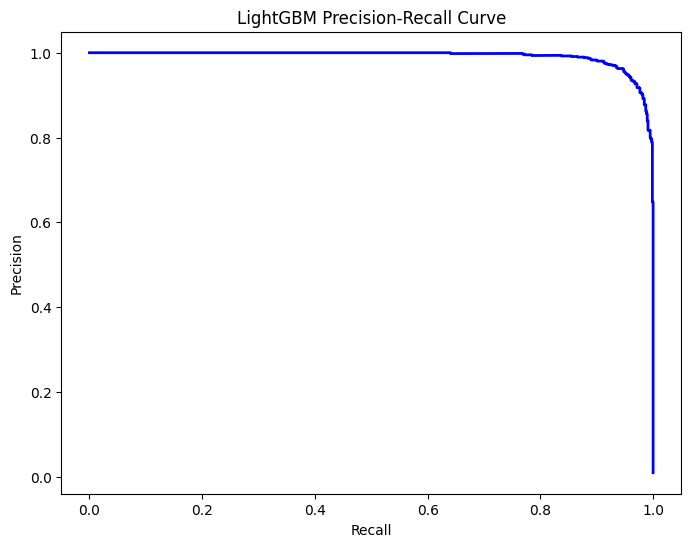

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Normal', 'Anomaly'], rotation=45)
    plt.yticks(tick_marks, ['Normal', 'Anomaly'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Function to plot precision-recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, title):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, lw=2, color='blue')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

# Evaluate and visualize models
models = {
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb,
    "XGBoost": best_xgb,
    "LightGBM": best_lgb
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    
    # Check if the model has predict_proba method
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
    else:
        # If predict_proba is not available, use decision_function
        y_pred_proba = model.decision_function(X_test)
    
    # Print classification report
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, f'{name} Confusion Matrix')
    
    # Plot ROC curve
    plot_roc_curve(y_test, y_pred_proba, f'{name} ROC Curve')
    
    # Plot precision-recall curve
    plot_precision_recall_curve(y_test, y_pred_proba, f'{name} Precision-Recall Curve')


In [52]:
from sklearn.model_selection import cross_val_score

# Conduct cross-validation
for name, model in models.items():
    print(f"Cross-validation for {name}...")
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
    print(f"{name} Cross-Validation F1 Scores: {cv_scores}")
    print(f"{name} Cross-Validation F1 Mean Score: {cv_scores.mean()}")


Cross-validation for Random Forest...
Random Forest Cross-Validation F1 Scores: [0.96221662 0.94623656 0.94616846 0.96721311 0.9672956 ]
Random Forest Cross-Validation F1 Mean Score: 0.9578260714229193
Cross-validation for Gradient Boosting...
Gradient Boosting Cross-Validation F1 Scores: [0.95684803 0.9487666  0.9525     0.9716803  0.96226415]
Gradient Boosting Cross-Validation F1 Mean Score: 0.9584118172908991
Cross-validation for XGBoost...
XGBoost Cross-Validation F1 Scores: [0.94198378 0.9391086  0.93947037 0.95400126 0.95904222]
XGBoost Cross-Validation F1 Mean Score: 0.9467212448996042
Cross-validation for LightGBM...
[LightGBM] [Info] Number of positive: 3213, number of negative: 318068
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 321281, number of used features: 6
[LightG

[LightGBM] [Info] Number of positive: 3213, number of negative: 318068
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1482
[LightGBM] [Info] Number of data points in the train set: 321281, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010001 -> initscore=-4.595060
[LightGBM] [Info] Start training from score -4.595060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [65]:
best_model = best_rf  # Replace this with the actual best model if it's not Random Forest
y_pred_full = best_model.predict(X_scaled)

df_cleaned['Anomaly'] = y_pred_full


print("Classification Report for Full Dataset:")
print(classification_report(y_pred_full, y))

Classification Report for Full Dataset:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    397610
           1       0.99      1.00      0.99      3992

    accuracy                           1.00    401602
   macro avg       0.99      1.00      1.00    401602
weighted avg       1.00      1.00      1.00    401602



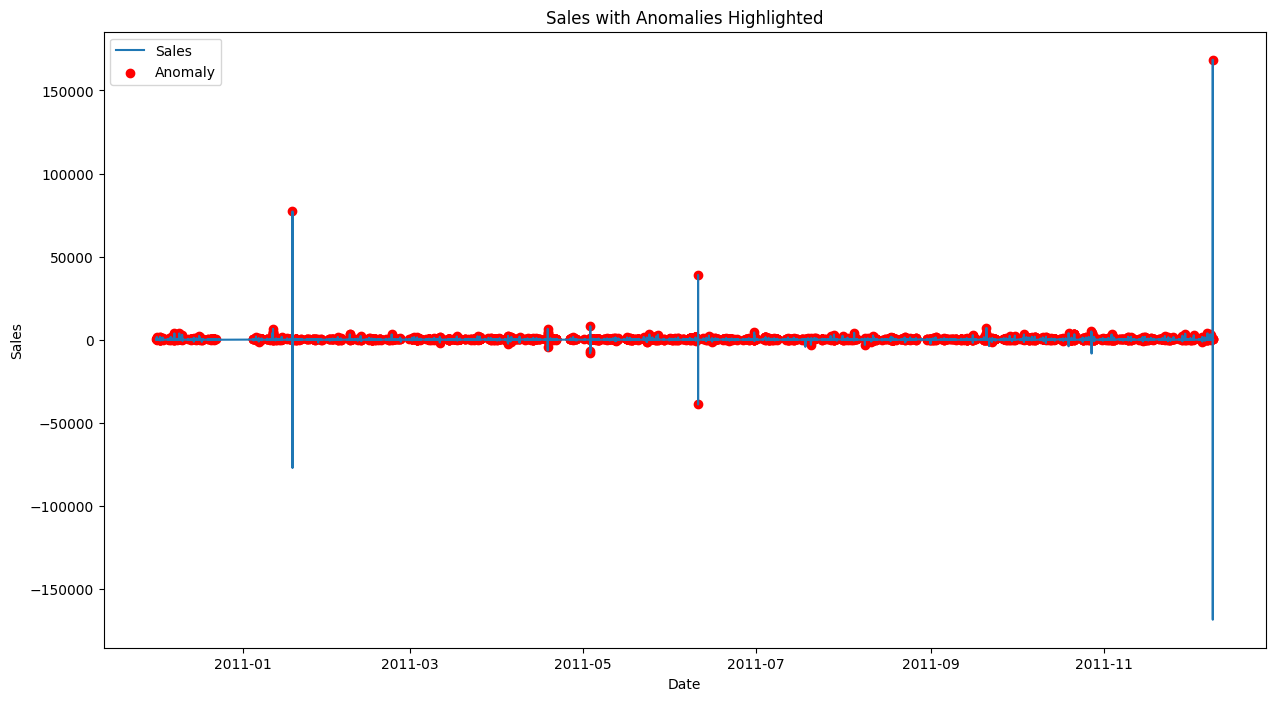

In [66]:
plt.figure(figsize=(15, 8))
plt.plot(df_cleaned['InvoiceDate'], df_cleaned['Sales'], label='Sales')
plt.scatter(df_cleaned[df_cleaned['Anomaly'] == 1]['InvoiceDate'],
            df_cleaned[df_cleaned['Anomaly'] == 1]['Sales'],
            color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales with Anomalies Highlighted')
plt.legend()
plt.show()

In [70]:
import joblib

joblib.dump(best_rf, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']